In [3]:
import numpy as np
from sklearn import datasets
wisconsin = datasets.load_breast_cancer()

In [24]:
print(wisconsin.keys())
print(wisconsin.data)
print(wisconsin.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [21]:
from sklearn.model_selection import train_test_split
TrainX, TestX, TrainY, TestY = train_test_split(wisconsin.data, wisconsin.target, test_size=0.3, random_state=0)
print(TrainX.shape)
print(TrainY.shape)
print(TestX.shape)
print(TestY.shape)

(398, 30)
(398,)
(171, 30)
(171,)


In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(TrainX,TrainY)
print(model.theta_)

[[1.75263087e+01 2.12936242e+01 1.15739530e+02 9.89914765e+02
  1.03175839e-01 1.44903154e-01 1.60549128e-01 8.89431544e-02
  1.92871812e-01 6.24804698e-02 6.20642282e-01 1.17787047e+00
  4.35542282e+00 7.52542282e+01 6.69622819e-03 3.12345168e-02
  3.97942282e-02 1.46321745e-02 2.02401275e-02 3.94693289e-03
  2.12708054e+01 2.89844295e+01 1.42098054e+02 1.44953624e+03
  1.45362349e-01 3.73629195e-01 4.41866309e-01 1.83275570e-01
  3.24036913e-01 9.13052349e-02]
 [1.21863815e+01 1.79357430e+01 7.83306827e+01 4.65552610e+02
  9.24651807e-02 7.96516867e-02 4.58566815e-02 2.58631888e-02
  1.73413655e-01 6.27457831e-02 2.82508434e-01 1.22036827e+00
  1.97572771e+00 2.11168554e+01 7.15546586e-03 2.14281406e-02
  2.60984562e-02 9.91100000e-03 2.04994739e-02 3.60831044e-03
  1.34207992e+01 2.34701205e+01 8.71740161e+01 5.61965462e+02
  1.24849679e-01 1.81405904e-01 1.64807940e-01 7.44982369e-02
  2.68332932e-01 7.91780723e-02]]


In [33]:
pred_train = model.predict(TrainX)
print(pred_train[:20])
print(TrainY[:20])

score_train = model.predict_proba(TrainX)
score_train[:10,:]

[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1]


array([[3.01258495e-14, 1.00000000e+00],
       [3.08800401e-15, 1.00000000e+00],
       [8.01924517e-14, 1.00000000e+00],
       [1.00000000e+00, 1.55557236e-17],
       [1.76929961e-13, 1.00000000e+00],
       [8.19450787e-17, 1.00000000e+00],
       [1.31537275e-11, 1.00000000e+00],
       [1.71165140e-17, 1.00000000e+00],
       [6.92921401e-02, 9.30707860e-01],
       [1.00000000e+00, 5.35089823e-76]])

In [39]:
pred_test = model.predict(TestX)
print(pred_test[:20])
print(TestY[:20])

score_test = model.predict_proba(TestX)
score_test[:10,:]

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0]


array([[9.99999623e-01, 3.77053186e-07],
       [4.48249009e-13, 1.00000000e+00],
       [3.80802767e-14, 1.00000000e+00],
       [1.92053261e-11, 1.00000000e+00],
       [2.78578114e-16, 1.00000000e+00],
       [4.21504591e-14, 1.00000000e+00],
       [9.54831838e-11, 1.00000000e+00],
       [8.42593606e-15, 1.00000000e+00],
       [1.80520999e-13, 1.00000000e+00],
       [5.70735050e-17, 1.00000000e+00]])

In [46]:
from sklearn import metrics
tr_acc = metrics.accuracy_score(TrainY, pred_train)
ts_acc = metrics.accuracy_score(TestY, pred_test)
print('tr Acc : ', tr_acc)
print('ts Acc : ', ts_acc)

tr Acc :  0.9422110552763819
ts Acc :  0.9239766081871345


In [48]:
tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, score_train[:, 1], pos_label=1)
ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, score_test[:, 1], pos_label=1)

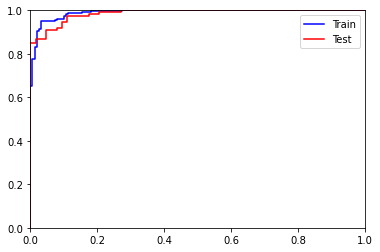

In [49]:
import matplotlib.pyplot as plt

plt.plot(tr_fpr, tr_tpr, color='b', label='Train')
plt.plot(ts_fpr, ts_tpr, color='r', label='Test')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()

In [50]:
tr_auc = metrics.roc_auc_score(TrainY, score_train[:,1])
print('tr AUC : ', tr_auc)

ts_auc = metrics.roc_auc_score(TestY, score_test[:,1])
print('ts AUC : ', ts_auc)

tr AUC :  0.9893803401525566
ts AUC :  0.9854497354497355
